In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [7]:
plt.style.use('fivethirtyeight')

In [19]:
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

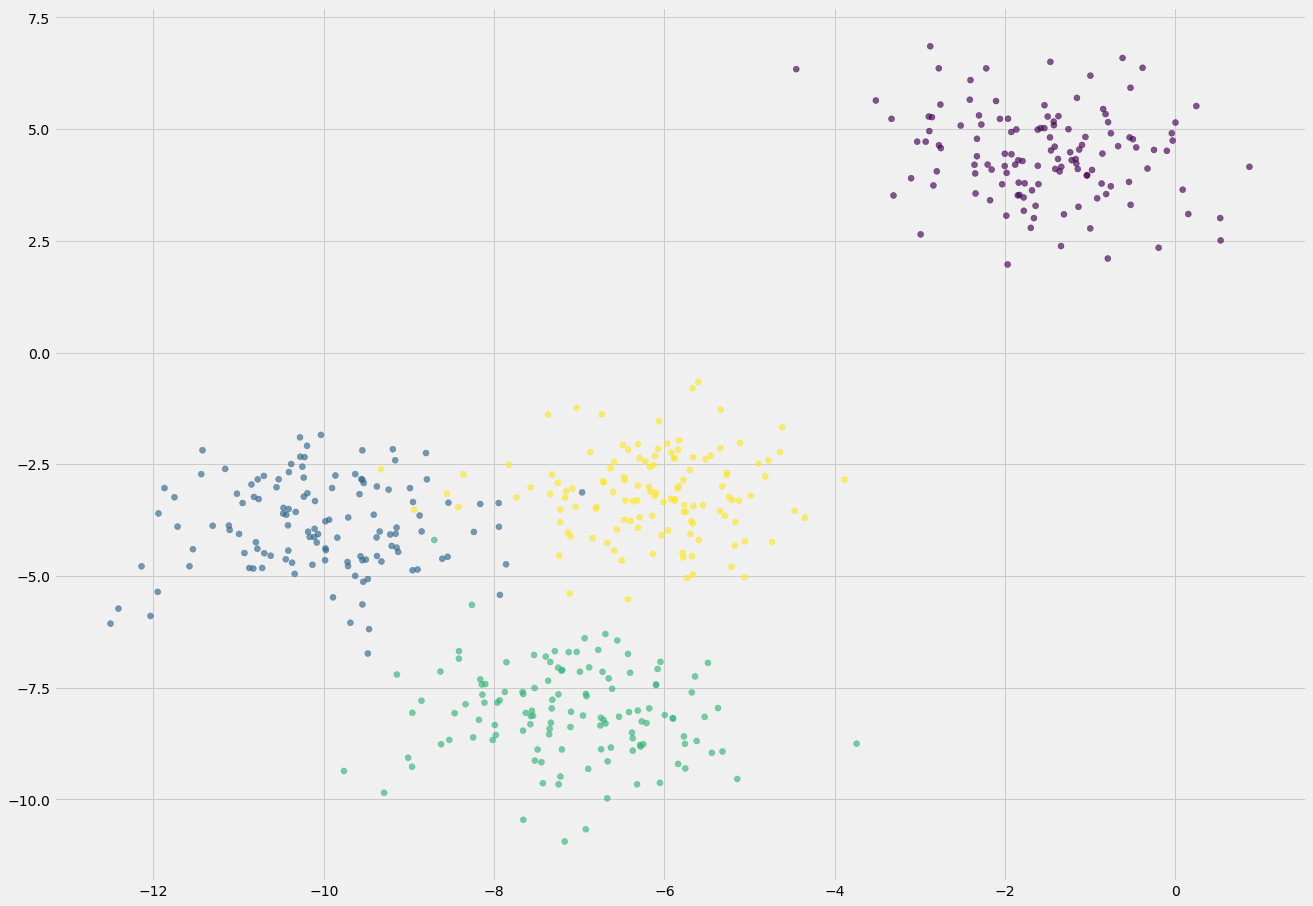

In [22]:
plt.figure(figsize=(20,15))
plt.scatter(X[:,0],X[:,1],alpha = 0.65,c = Y)

score : 0.7049787496083262
score : 0.5882004012129721
score : 0.6505186632729437
score : 0.5746932321727457
score : 0.45138492040688916
score : 0.3829106322430107
score : 0.3220267640278079
score : 0.34140821863086435
score : 0.3358019257777663
score : 0.33958016832271953
score : 0.3547886615144174
score : 0.3542382835674205
score : 0.3480008858681111
score : 0.34631957132992625


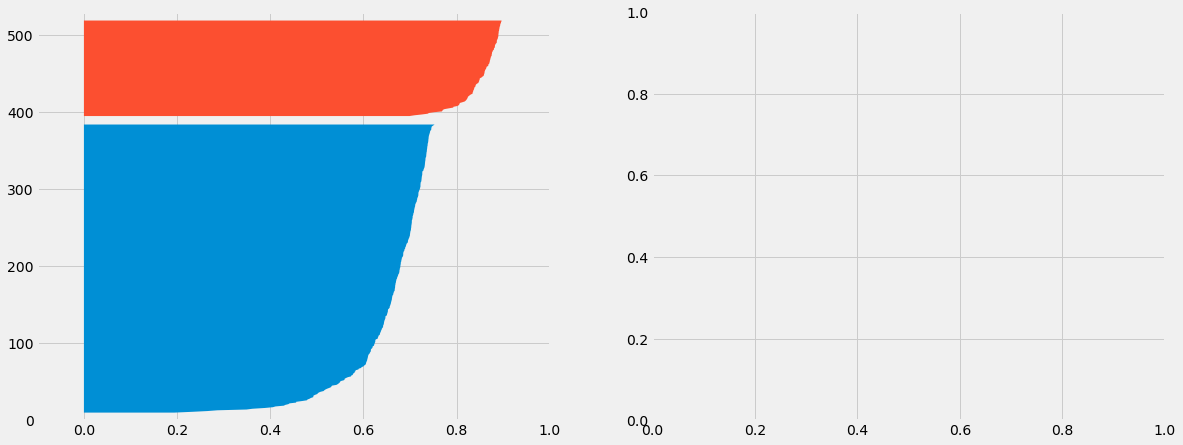

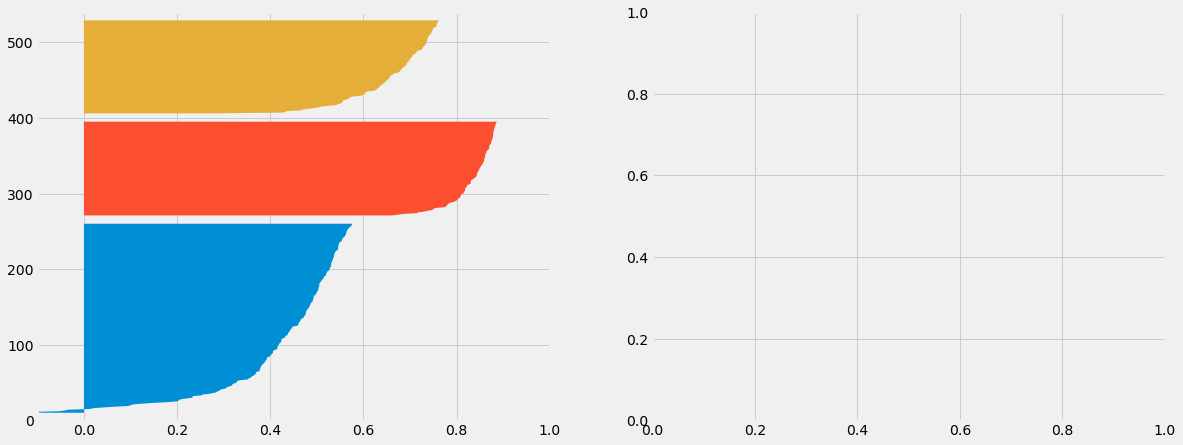

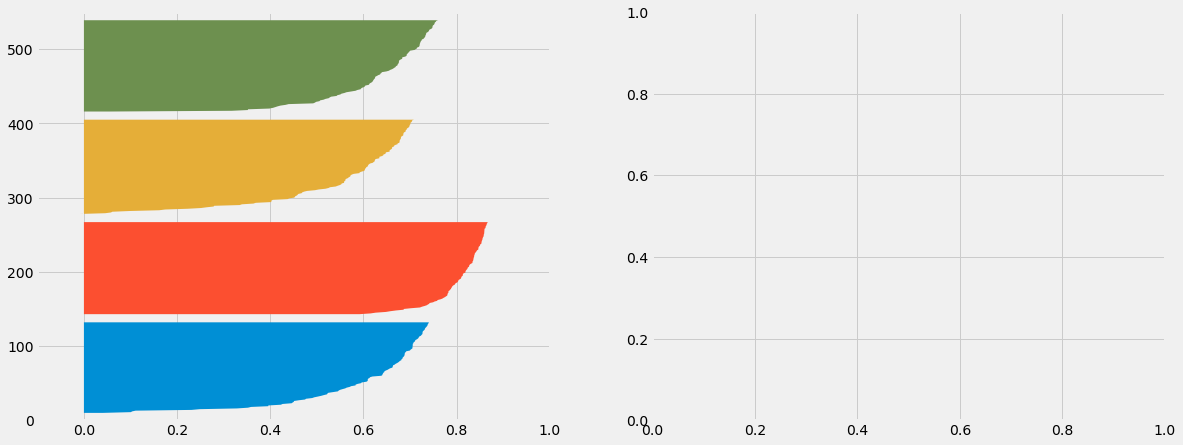

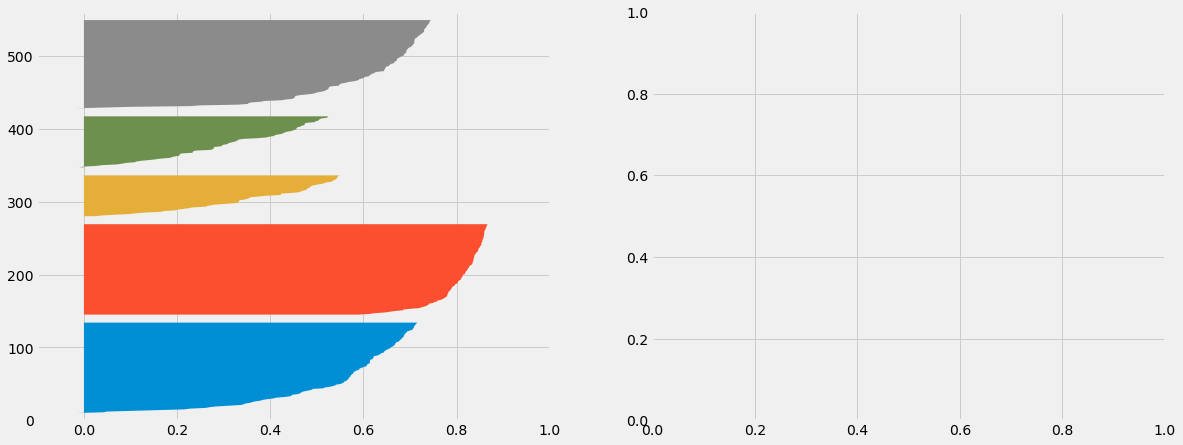

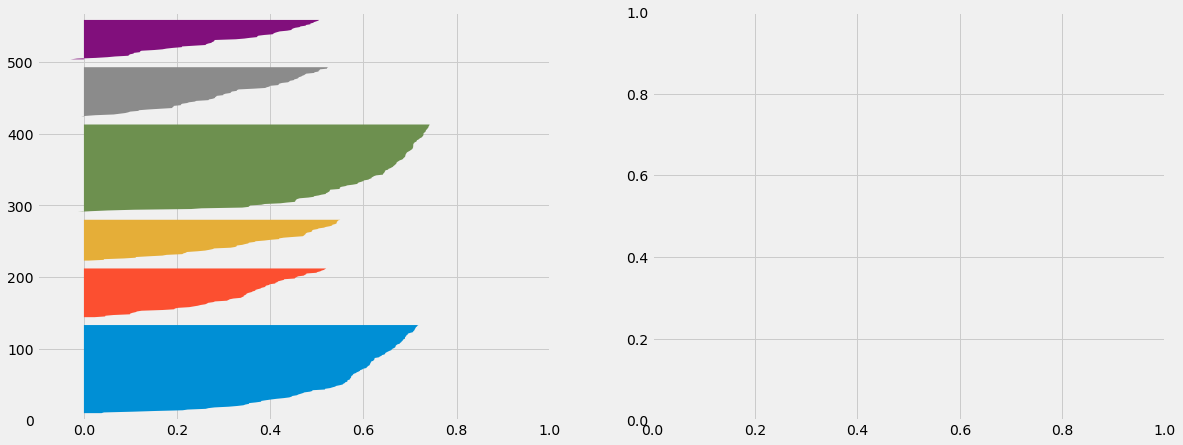

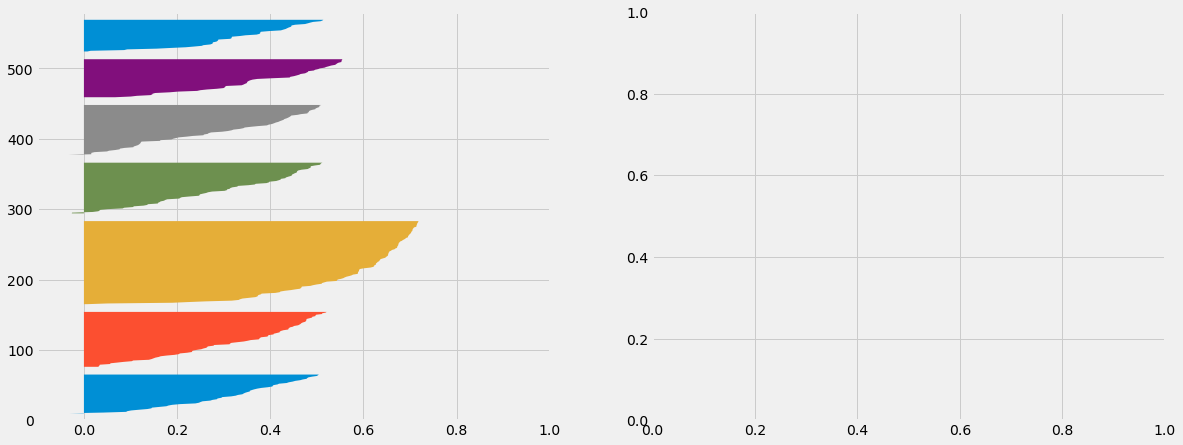

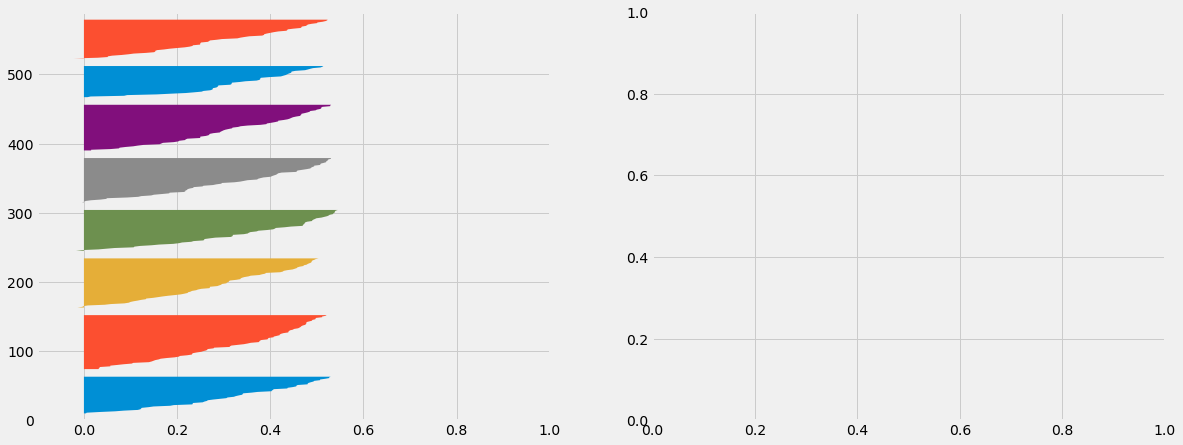

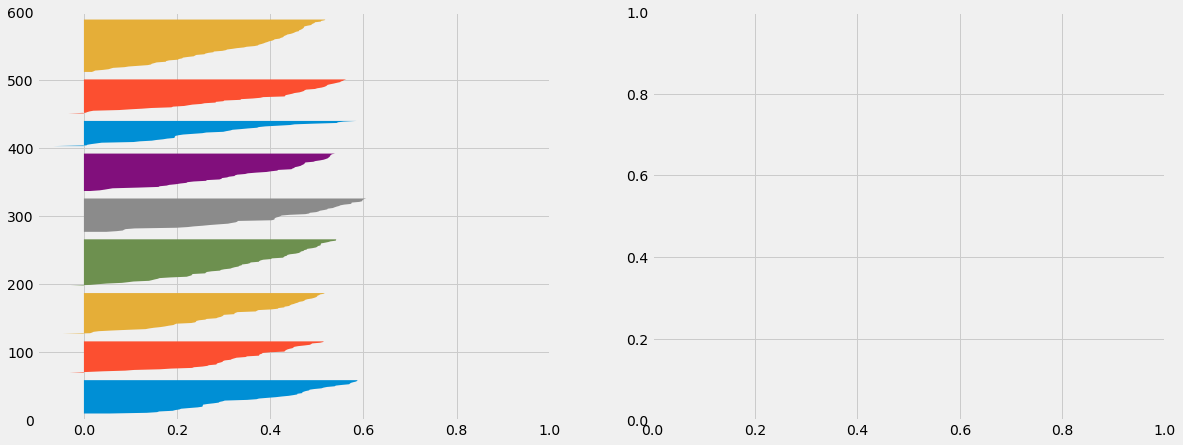

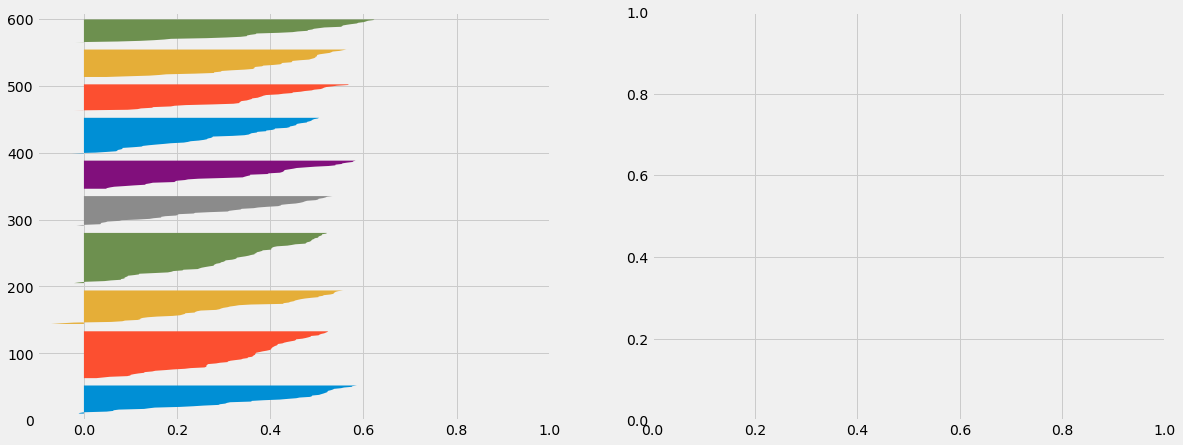

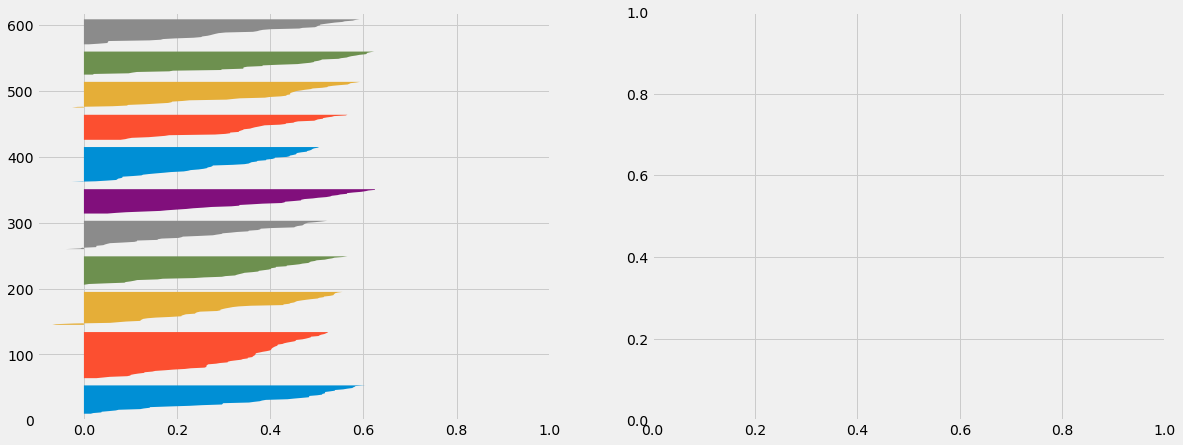

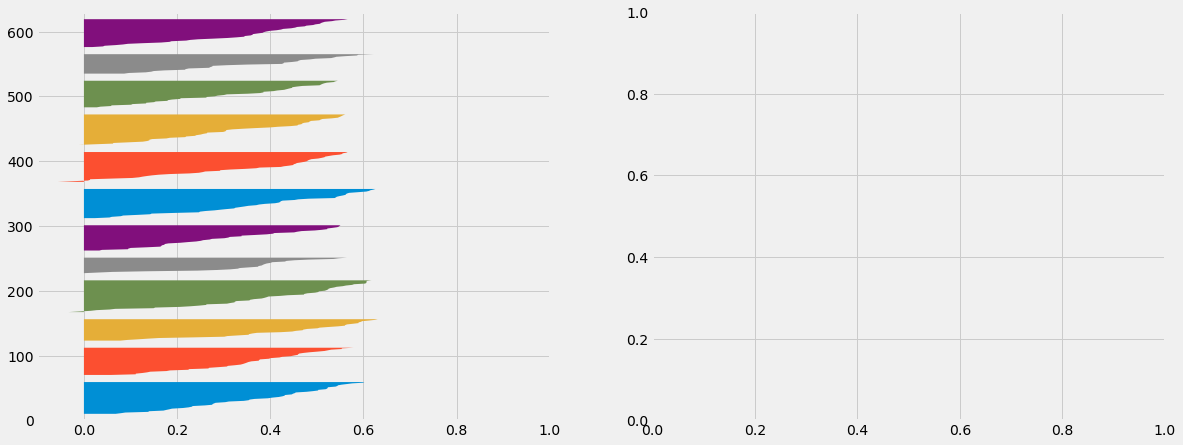

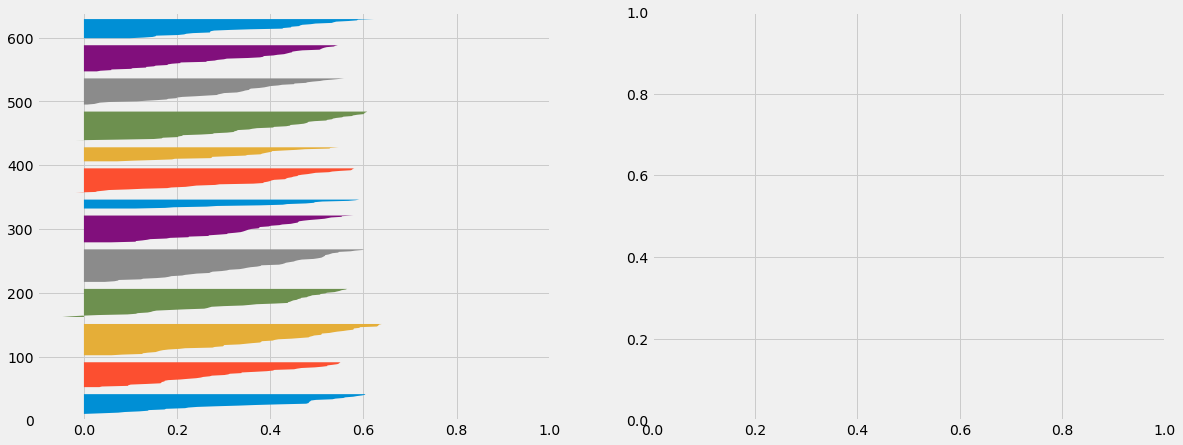

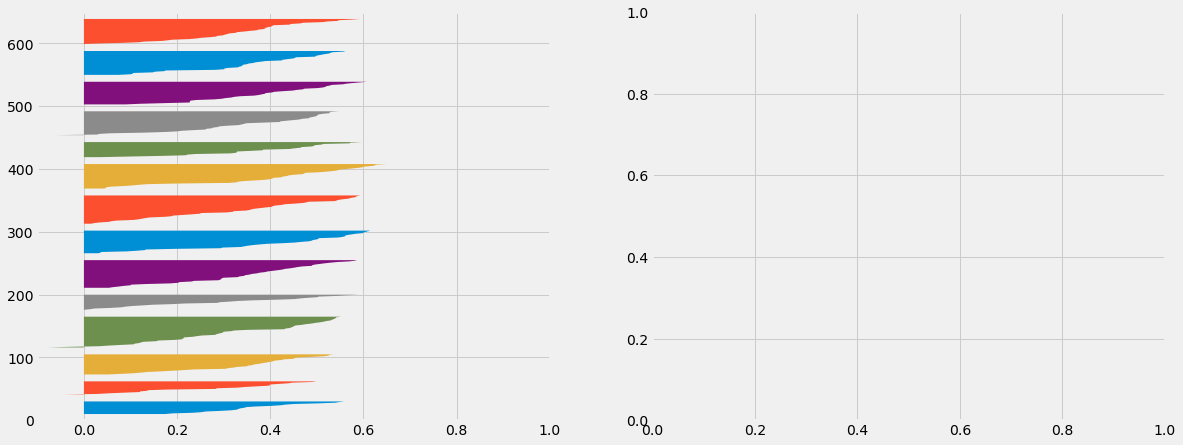

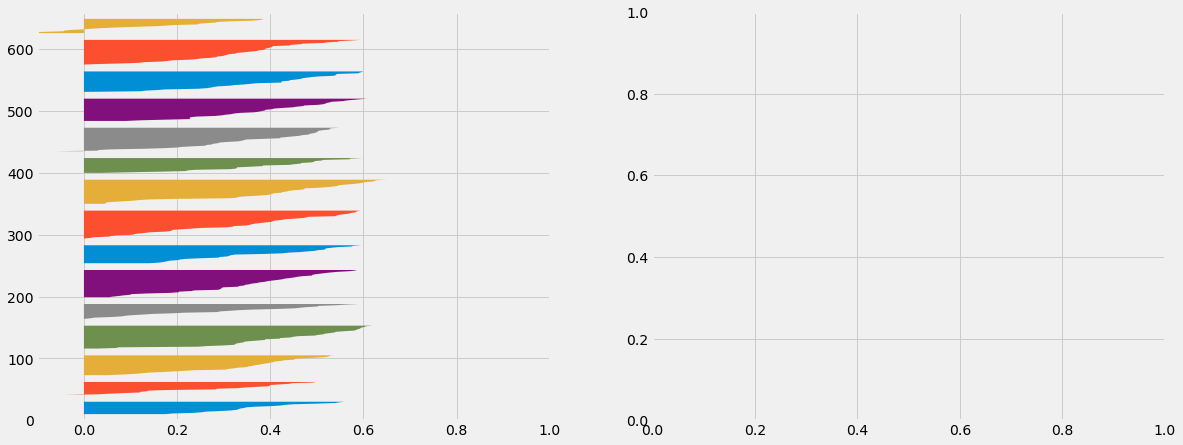

In [64]:
clusters = 15
for cluster in range(2,clusters+1):
    km = KMeans(n_clusters=cluster,random_state=1)
    y = km.fit_predict(X)

    # plt.figure(figsize=(20,15))
    # plt.scatter(X[:,0],X[:,1],alpha = 0.75,c = y)
    # plt.show()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (cluster + 1) * 10])
    score = silhouette_score(X,y)
    print('score :',score)

    sil_sample = silhouette_samples(X,y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10